In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# Importing the dataset
dataset = pd.read_csv('../data/Social_Network_Ads.csv')


In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
X = dataset.loc[:, ['Age', 'EstimatedSalary']].values
y = dataset.loc[:, 'Purchased'].values.reshape(-1, 1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)


In [11]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/Users/u1b1700/.pyenv/versions/3.7.2/envs/udemy/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/u1b1700/.pyenv/versions/3.7.2/envs/udemy/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/u1b1700/.pyenv/versions/3.7.2/envs/udemy/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(penalty='l2',
                                dual=False,
                                tol=0.0001,
                                C=1.0,
                                fit_intercept=True,
                                intercept_scaling=1,
                                class_weight=None,
                                random_state=0,
                                solver='lbfgs',
                                max_iter=100,
                                multi_class='auto',
                                verbose=0,
                                warm_start=False,
                                n_jobs=None)
classifier.fit(X_train, y_train)

/Users/u1b1700/.pyenv/versions/3.7.2/envs/udemy/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[65  3]
 [ 8 24]]


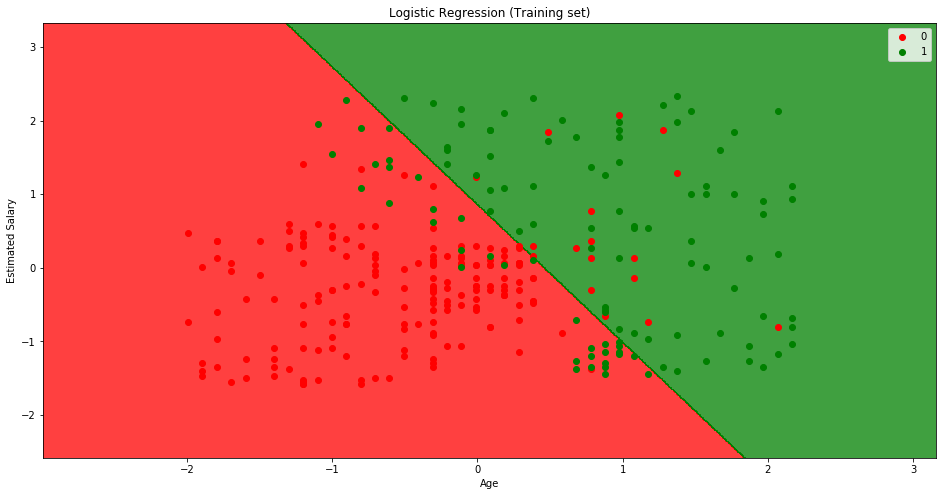

In [86]:
# Visualising the Training set results
X_set, y_set = X_train, y_train

fig = plt.figure(figsize=(16, 8))
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1,
                               step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1,
                               step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
                                X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[(y_set == j).ravel(), 0],
                X_set[(y_set == j).ravel(), 1],
                c=np.array([ListedColormap(('red', 'green'))(i)]),
                label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

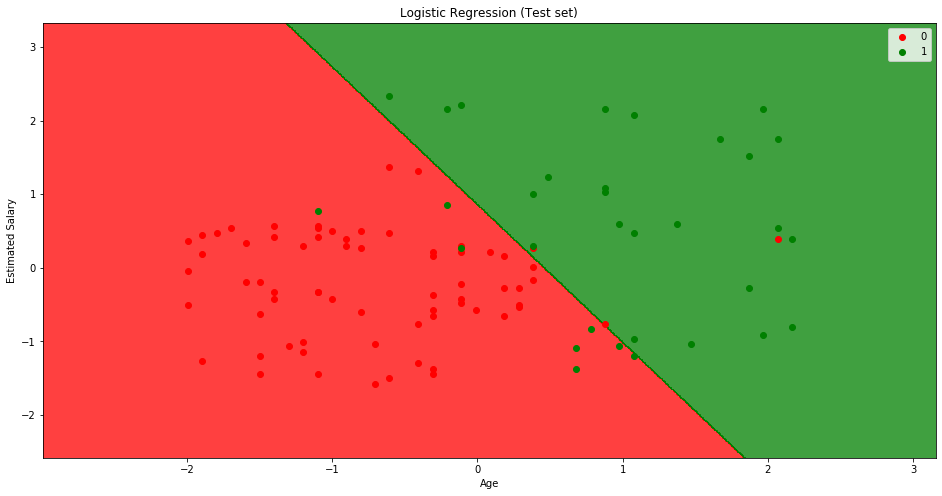

In [87]:
# Visualising the Test set results
X_set, y_set = X_test, y_test

fig = plt.figure(figsize=(16, 8))
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1,
                               step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1,
                               step=0.01))
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
                                X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[(y_set == j).ravel(), 0], 
                X_set[(y_set == j).ravel(), 1],
                c=np.array([ListedColormap(('red', 'green'))(i)]), 
                label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()